In [1]:
import numpy as np
from matplotlib import pyplot as plt

import witss

## Basic iterated sums

In [2]:
a = np.random.normal(size=10_000)

itsum = witss.iss(a, "[1][1]")
itsum_norm = witss.iss(a, "[1][1]", normalize="sqrt")

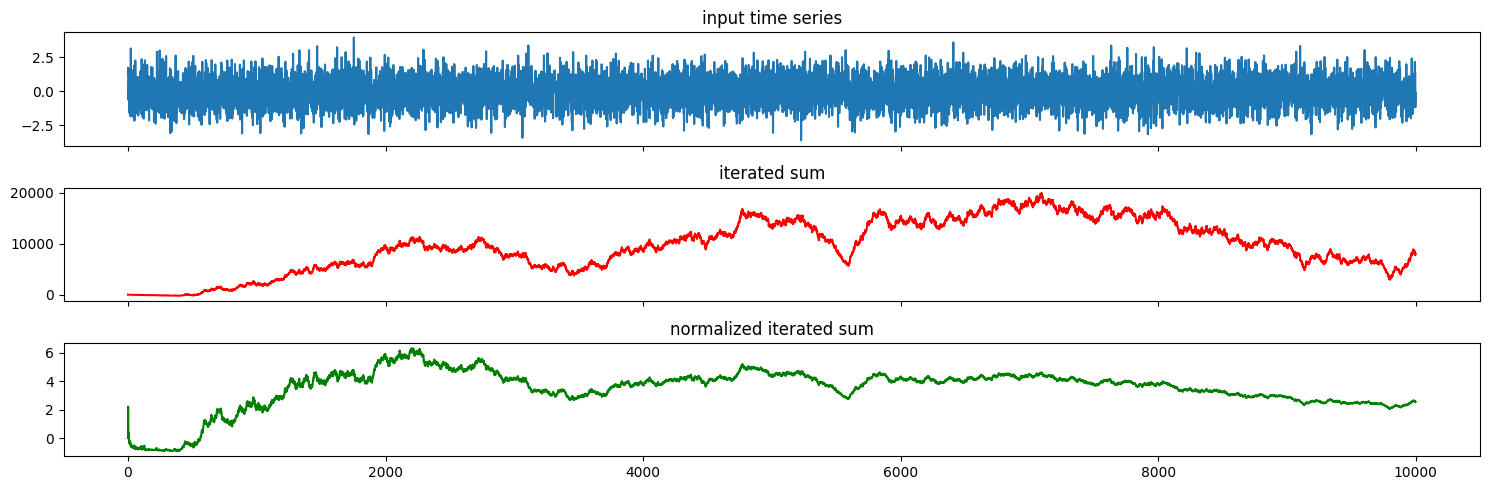

In [3]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(15, 5))
ax[0].plot(a)
ax[0].set_title("input time series")
ax[1].plot(itsum, color="red")
ax[1].set_title("iterated sum")
ax[2].plot(itsum_norm, color="green")
ax[2].set_title("normalized iterated sum")
fig.tight_layout()

## Compute the signature up to some total word weight


In [4]:
x = np.random.normal(size=(10, 20_000, 2))

iss = witss.iss(x, witss.words.up_to_weight(4, dim=2))

print("Shape of iss(x, [1][1][2]):",iss["[1][1][2]"].shape)
print("Shape of the signature up to depth 4:", iss.numpy().shape)

Shape of iss(x, [1][1][2]): (10, 20000)
Shape of the signature up to depth 4: (115, 10, 20000)


## Speed of computations

In [5]:
# 100 time series of length 10_000 with 2 dimensions
x = np.random.random((100, 10_000, 2))

#### Batches

In [6]:
%%timeit -n 10

witss.iss(x, witss.Word("[1][1][1][1]"), batches=1)

65 ms ± 5.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
%%timeit -n 10

witss.iss(x, witss.Word("[1][1][1][1]"), batches=20)

27.6 ms ± 2.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### BagOfWords

In [8]:
bagofwords = witss.BagOfWords(*[i*"[1]" for i in range(1, 10)])
words = bagofwords.words()
print(bagofwords.explain())

0: [1][1][1][1][1][1][1][1][1] - computed
1: [1][1][1][1][1][1][1][1]    - prefix of 0
2: [1][1][1][1][1][1][1]       - prefix of 0
3: [1][1][1][1][1][1]          - prefix of 0
4: [1][1][1][1][1]             - prefix of 0
5: [1][1][1][1]                - prefix of 0
6: [1][1][1]                   - prefix of 0
7: [1][1]                      - prefix of 0
8: [1]                         - prefix of 0


In [9]:
%%timeit -n 10

witss.iss(x, bagofwords, batches=20)

117 ms ± 14.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%%timeit -n 10

[witss.iss(x, w, batches=20) for w in words]

220 ms ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
